# TP 2

In [4]:
import numpy as np
import numpy.random 
import matplotlib.pyplot as plt
import numpy.linalg

Implémentation du filtre de Kalman pour la dynamique donnée :

Constantes

In [5]:
delta_t = 1
c=2
m_0 = np.array([5000,5000,-20,20])
P_0 = np.diag([2000**2,2000**2,5**2,5**2])
F = np.array([[1,0,delta_t,0],[0,1,0,delta_t],[0,0,1,0],[0,0,0,1]])
G = np.array([[c*delta_t**2/2,0],[0,c*delta_t**2/2],[delta_t*c,0],[0,delta_t*c]])
N=200
T=N*delta_t
S = np.array([[50,0],[0,50]])
R= S*S

Simulation de la dynamique

In [6]:
def tirage_X_0(m_0,P_0):
    Normale_centree_reduite = np.random.normal(size=4)
    X_0 = m_0 + np.dot(np.sqrt(P_0),Normale_centree_reduite)
    return(X_0)

def dynamique(delta_t,N,m_0,P_0):
    X_0 = tirage_X_0(m_0,P_0)
    X=[X_0]
    for i in range(N):
        w= np.random.normal(0,1,2)
        X.append(np.dot(F,X[-1])+np.dot(G,w))
    return(np.array(X))

Calcul d'une trajectoire

In [16]:
X = dynamique(delta_t,N,m_0,P_0)

Tracé d'une trajectoire

----------position---------


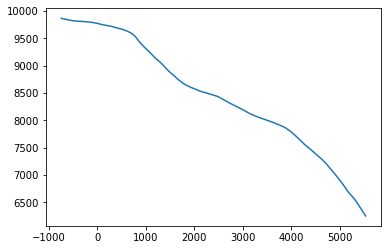

---------vitesse---------


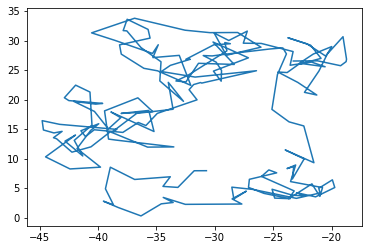

In [17]:
print("----------position---------")
plt.plot(X[:,0],X[:,1])
plt.show()
print("---------vitesse---------")
plt.plot(X[:,2],X[:,3])
plt.show()


In [9]:
def fonction_d_observation(x,S): #x est un array 1*2
    bruit_gaussien = np.dot(S,np.random.normal(0,1,2))
    return(x+bruit_gaussien)

fonction_d_observation(X[:,:2][6],S)


array([  43.66635363, 7162.74417799])

filtre de Kalman

In [10]:
H = np.array([[1,0,0,0],[0,1,0,0]])

def Kalman(delta_t,S,X): 
    """X est la dynamique et Y sont les observations"""
    n,p = np.shape(X)
    X_k_k=[m_0]
    P_k_k = [P_0]
    X_k_k_1 = []
    P_k_k_1 = []
    K_k = [] # gain de kamlan
    for i in range(1,n) : 
        print("etape "+ str(i))
        print('prediction')
        # prediction
        X_k_k_1.append(np.dot(F,X_k_k[-1]))
        FP = np.dot(F,P_k_k[-1])
        FPF = np.dot(FP,F.T)
        GGT = np.dot(G,G.T)
        P_k_k_1.append(FPF+GGT)
        print('correction')
        # correction
        PH = np.dot(  P_k_k_1[-1],  H.T)
        HP = np.dot(  H,P_k_k_1[-1])
        HPHT = np.dot(HP,H.T)
        inverse = np.linalg.inv( HPHT +  R)
        K_k.append(np.dot(PH,inverse))  
        P_k_k.append( np.dot( (np.identity(4)-np.dot(K_k,H)) , P_k_k_1[-1] )[0])
        Y_k = fonction_d_observation(X[:,:2][i],S)
        X_k_k.append( (X_k_k_1[-1] +np.dot( K_k, Y_k - np.dot( H, X_k_k_1[-1])))[0])
        # print(np.shape(X_k_k[-1]))
    return(np.array(X_k_k),np.array(P_k_k))



In [31]:
X_k_k,P_k_k = Kalman(delta_t,S,X)
covariance_position = P_k_k[:,:2,:2]

etape 1
prediction
correction
etape 2
prediction
correction
etape 3
prediction
correction
etape 4
prediction
correction
etape 5
prediction
correction
etape 6
prediction
correction
etape 7
prediction
correction
etape 8
prediction
correction
etape 9
prediction
correction
etape 10
prediction
correction
etape 11
prediction
correction
etape 12
prediction
correction
etape 13
prediction
correction
etape 14
prediction
correction
etape 15
prediction
correction
etape 16
prediction
correction
etape 17
prediction
correction
etape 18
prediction
correction
etape 19
prediction
correction
etape 20
prediction
correction
etape 21
prediction
correction
etape 22
prediction
correction
etape 23
prediction
correction
etape 24
prediction
correction
etape 25
prediction
correction
etape 26
prediction
correction
etape 27
prediction
correction
etape 28
prediction
correction
etape 29
prediction
correction
etape 30
prediction
correction
etape 31
prediction
correction
etape 32
prediction
correction
etape 33
predicti

In [12]:
def plot_cov(cov, mean=[0, 0], cst=6, num=200):
    """Display the ellipse associated to the covariance matrix cov.
    If mean is specified, the ellipse is translated accordingly.
    """
    cov = np.linalg.inv(np.asarray(cov))
    mean = np.asarray(mean)
    theta = np.linspace(0, 2*np.pi, num=num)
    X = np.c_[np.cos(theta), np.sin(theta)]
    X = X.T * np.sqrt(cst / np.diag(X.dot(cov.dot(X.T))))
    X = X.T + mean
    plt.plot(X[:, 0], X[:, 1], 'r')

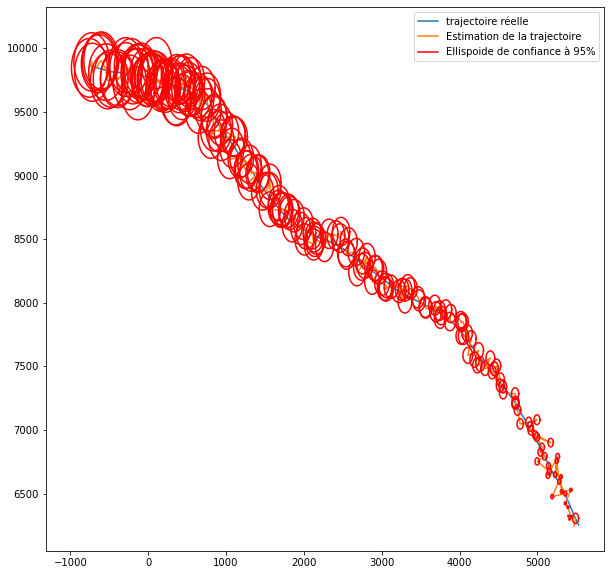

In [43]:
n,p = np.shape(X_k_k)
plt.figure(figsize = (10,10))
plt.plot(X[:,0],X[:,1])
plt.plot(X_k_k[1:,0],X_k_k[1:,1])
for i in range(2,n):
    plot_cov(covariance_position[i],X_k_k[i,:2],cst = 1000)
plt.legend(["trajectoire réelle","Estimation de la trajectoire","Ellispoide de confiance à 95%"])
plt.show()